In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
cd Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [3]:
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


In [4]:
proliferation = pd.read_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv',
                            header=None, index_col=[0,1], squeeze=True)
proliferation = proliferation[:,1]
proliferation.name = 'proliferation'

In [5]:
v = rna_df.ix['ABCB1'][:,'01']

In [6]:
cancer = run.load_cancer('CESC')
rna = cancer.load_data('mRNASeq')

In [11]:
rr2 = {}
for g in rna.features.ix['real'].index:
    if g not in rna.df.index:
        continue
    rr2[g] = get_cox_ph_ms(surv_5y, rna.df.ix[g][:,'01'], [proliferation], 
                          interactions=False)
rr2 = pd.concat(rr2,1).T.sort('LR')

In [24]:
rr2.head(10)

,LR,feature_p,fmla,hazzard
FOXP3,1.1e-06,3.48e-07,"Surv(days, event) ~ feature + proliferation\n",0.637
C1orf59,6.57e-06,1.76e-07,"Surv(days, event) ~ feature + proliferation\n",0.561
CHAF1A,1.32e-05,1.07e-05,"Surv(days, event) ~ feature + proliferation\n",0.359
CTLA4,1.93e-05,1.6e-05,"Surv(days, event) ~ feature + proliferation\n",0.705
IDO2,1.98e-05,1.37e-05,"Surv(days, event) ~ feature + proliferation\n",0.755
TIGIT,2.22e-05,1.15e-05,"Surv(days, event) ~ feature + proliferation\n",0.74
SELP,2.43e-05,8.35e-06,"Surv(days, event) ~ feature + proliferation\n",0.753
NPL,3.32e-05,7.17e-06,"Surv(days, event) ~ feature + proliferation\n",0.638
ITGB7,3.55e-05,9.99e-06,"Surv(days, event) ~ feature + proliferation\n",0.641
ARRDC5,3.71e-05,1.01e-05,"Surv(days, event) ~ feature + proliferation\n",0.724


In [68]:
%%time
rr = {}
for i,v in rna.pathways.iterrows():
    rr[i] = get_cox_ph_ms(surv_5y, v, [proliferation], 
                          interactions=False)

CPU times: user 1min 37s, sys: 67.1 ms, total: 1min 37s
Wall time: 1min 37s


In [69]:
pd.concat(rr,1).T.sort('LR').head()

,LR,feature_p,fmla,hazzard
BIOCARTA_CTLA4_PATHWAY,1.05e-05,8.51e-06,"Surv(days, event) ~ feature + proliferation\n",0.566
BIOCARTA_IL12_PATHWAY,1.7e-05,1.2e-05,"Surv(days, event) ~ feature + proliferation\n",0.575
BIOCARTA_NO2IL12_PATHWAY,2.12e-05,1.62e-05,"Surv(days, event) ~ feature + proliferation\n",0.579
BIOCARTA_CSK_PATHWAY,3.18e-05,2.05e-05,"Surv(days, event) ~ feature + proliferation\n",0.595
BIOCARTA_TH1TH2_PATHWAY,3.86e-05,3.52e-05,"Surv(days, event) ~ feature + proliferation\n",0.581


In [80]:
rr2 = {}
for g in run.gene_sets['BIOCARTA_CTLA4_PATHWAY']:
    if g not in rna.df.index:
        continue
    rr2[g] = get_cox_ph_ms(surv_5y, rna.df.ix[g][:,'01'], [proliferation], 
                          interactions=False)
rr2 = pd.concat(rr2,1).T.sort('LR')

In [82]:
rr2.head()

,LR,feature_p,fmla,hazzard
CD80,1.24e-05,5.3e-06,"Surv(days, event) ~ feature + proliferation\n",0.69
CD3E,1.31e-05,5.83e-06,"Surv(days, event) ~ feature + proliferation\n",0.723
ICOS,1.33e-05,4.95e-06,"Surv(days, event) ~ feature + proliferation\n",0.724
CTLA4,1.93e-05,1.6e-05,"Surv(days, event) ~ feature + proliferation\n",0.705
CD3D,3.72e-05,1.54e-05,"Surv(days, event) ~ feature + proliferation\n",0.75


In [100]:
len(rna.df) * 1.24e-05

0.2542248

In [107]:
cox(proliferation.ix[idx], surv_5y)

hazard       exp(coef)     4.78e+04
             exp(-coef)    2.09e-05
             lower .95     8.68e+01
             upper .95     2.64e+07
LR           stat          1.23e+01
             df            1.00e+00
             p             4.56e-04
concordance  stat          6.61e-01
             se            3.99e-02
dtype: float64

In [86]:
cox(rna.df.ix['CD80'][:,'01'], surv_5y)

hazard       exp(coef)     0.83
             exp(-coef)    1.20
             lower .95     0.73
             upper .95     0.96
LR           stat          6.27
             df            1.00
             p             0.01
concordance  stat          0.60
             se            0.04
dtype: float64

In [ ]:
print get_cox_ph(surv_5y, rna.df.ix['CD80'][:,'01']
                 interactions=False)

In [82]:
f1 = robjects.Formula('Surv(days, event) ~ feature')
f2 = robjects.Formula('Surv(days, event) ~ feature + proliferation')

In [83]:
feature = rna.df.ix['CD80'][:,'01']
idx = proliferation.index.intersection(feature.index)
m1 = get_cox_ph(surv_5y, feature.ix[idx], [proliferation.ix[idx]], 
                formula=f1)
m2 = get_cox_ph(surv_5y, feature.ix[idx], [proliferation.ix[idx]], 
                formula=f2)

In [84]:
print robjects.r.anova(m1, m2)

Analysis of Deviance Table
 Cox model: response is  Surv(days, event)
 Model 1: ~ feature
 Model 2: ~ feature + proliferation
   loglik  Chisq Df P(>|Chi|)    
1 -297.88                        
2 -285.32 25.117  1 5.396e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [87]:
print get_cox_ph(surv_5y, rna.df.ix['CD80'][:,'01'], [proliferation], 
           interactions=False)

Call:
(function (formula, data, weights, subset, na.action, init, control, 
    ties = c("efron", "breslow", "exact"), singular.ok = TRUE, 
    robust = FALSE, model = FALSE, x = FALSE, y = TRUE, tt, method = ties, 
    ...) 
{
    ties <- match.arg(ties)
    Call <- match.call()
    indx <- match(c("formula", "data", "weights", "subset", "na.action"), 
        names(Call), nomatch = 0)
    if (indx[1] == 0) 
        stop("A formula argument is required")
    temp <- Call[c(1, indx)]
    temp[[1]] <- as.name("model.frame")
    special <- c("strata", "cluster", "tt")
    temp$formula <- if (missing(data)) 
        terms(formula, special)
    else terms(formula, special, data = data)
    if (!is.null(attr(temp$formula, "specials")$tt)) {
        coxenv <- new.env(parent = environment(formula))
        assign("tt", function(x) x, env = coxenv)
        environment(temp$formula) <- coxenv
    }
    mf <- eval(temp, parent.frame())
    if (nrow(mf) == 0) 
        stop("No (non-missing) obser

In [34]:
print get_cox_ph(surv_5y, rna.df.ix['CD80'][:,'01'], [proliferation])

Call:
(function (formula, data, weights, subset, na.action, init, control, 
    ties = c("efron", "breslow", "exact"), singular.ok = TRUE, 
    robust = FALSE, model = FALSE, x = FALSE, y = TRUE, tt, method = ties, 
    ...) 
{
    ties <- match.arg(ties)
    Call <- match.call()
    indx <- match(c("formula", "data", "weights", "subset", "na.action"), 
        names(Call), nomatch = 0)
    if (indx[1] == 0) 
        stop("A formula argument is required")
    temp <- Call[c(1, indx)]
    temp[[1]] <- as.name("model.frame")
    special <- c("strata", "cluster", "tt")
    temp$formula <- if (missing(data)) 
        terms(formula, special)
    else terms(formula, special, data = data)
    if (!is.null(attr(temp$formula, "specials")$tt)) {
        coxenv <- new.env(parent = environment(formula))
        assign("tt", function(x) x, env = coxenv)
        environment(temp$formula) <- coxenv
    }
    mf <- eval(temp, parent.frame())
    if (nrow(mf) == 0) 
        stop("No (non-missing) obser

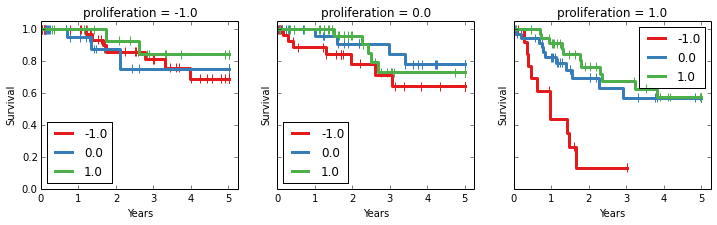

In [25]:
idx = rna.df.columns.levels[0]
draw_survival_curves(to_quants(rna.df.ix['CD80'][:,'01'], q=.33),
                     surv_5y, to_quants(proliferation.ix[idx], q=.33), legend=True)

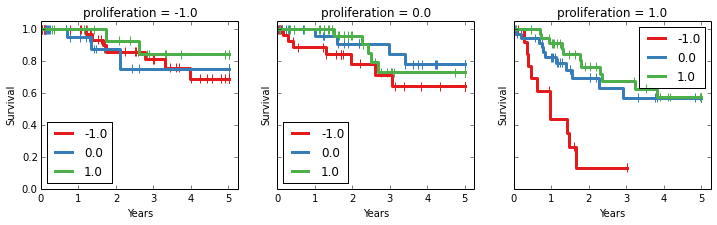

In [106]:
idx = rna.df.columns.levels[0]
draw_survival_curves(to_quants(rna.df.ix['CD80'][:,'01'], q=.33),
                     surv_5y, to_quants(proliferation.ix[idx], q=.33), legend=True)

In [98]:
v = rna.df.ix['CD80'][:,'01']
get_cox_ph_ms(surv_5y, v.ix[ti(codes=='CESC')], [proliferation], 
              interactions=False)

LR                                                1.24e-05
feature_p                                          5.3e-06
fmla         Surv(days, event) ~ feature + proliferation\n
hazzard                                               0.69
dtype: object

In [99]:
get_cox_ph_ms(surv_5y, v.ix[ti(codes=='CESC')],  
              interactions=False)

LR                                  0.0123
feature_p                          0.00975
fmla         Surv(days, event) ~ feature\n
hazzard                              0.834
dtype: object

In [100]:
r = {}
for c in codes.unique():
    try:
        r[c] = get_cox_ph_ms(surv_5y, rna_df.ix['CD80'][:,'01'].ix[ti(codes==c)], 
                            [proliferation], 
                            interactions=False)
    except:
        print c

STAD
ESCA
LAML


In [120]:
pd.concat(r, 1).T.sort('LR').head()

,LR,feature_p,fmla,hazzard
CESC,1.24e-05,5.3e-06,"Surv(days, event) ~ feature + proliferation\n",0.69
LGG,0.000469,0.00053,"Surv(days, event) ~ feature + proliferation\n",1.25
LUAD,0.0248,0.0218,"Surv(days, event) ~ feature + proliferation\n",0.876
PAAD,0.0399,0.0511,"Surv(days, event) ~ feature + proliferation\n",1.15
THCA,0.0542,0.055,"Surv(days, event) ~ feature\n",1.45
